## Validating Min-Max of SAP

Author: Syamanthaka B

Created: May 2019

-------------------------------------------------------------------------------

Two input files one from MBP and one from SAP MP1, are compared by Material No. to check for discrepancy in Min and Max qty values.

### Import libraries and input file

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mbp_raw = pd.read_excel("Min-Max_MBP_copy.xlsx", sheet_name="Sheet1")
mbp_raw = mbp_raw[['Plant', 'Material No.', 'Active / No Demand', 'Min Inv. (qty)', 'Max Inv. (qty)']]
mbp_raw.head()

,Plant,Material No.,Active / No Demand,Min Inv. (qty),Max Inv. (qty)
0,NL94 (RS Best),452220609932\n Basic System Brill. iCT (ROHS E...,Active,0.0,2.0
1,US9L (Latham),459801249492\n SHIELD LINER APPLICATION - PATI...,Active,0.0,6.0
2,US9L (Latham),459801249502\n SHIELD LINER APPLICATION - SERV...,Active,0.0,6.0
3,BR9S (PMS Varginha),450602242881\n KIT PCBA0131 COMPACTO FOR SERVICE,Active,0.0,22.0
4,NL94 (RS Best),452220606401\n TI - 708038 - MD Eleva Flat Det...,No Demand,0.0,1.0


### Multi step cleaning

In [3]:
## Removing some rows which have a '-' as value
mbp_raw.drop(mbp_raw[mbp_raw['Material No.'].str.match('-')].index, inplace=True)
mbp_raw.head()

,Plant,Material No.,Active / No Demand,Min Inv. (qty),Max Inv. (qty)
0,NL94 (RS Best),452220609932\n Basic System Brill. iCT (ROHS E...,Active,0.0,2.0
1,US9L (Latham),459801249492\n SHIELD LINER APPLICATION - PATI...,Active,0.0,6.0
2,US9L (Latham),459801249502\n SHIELD LINER APPLICATION - SERV...,Active,0.0,6.0
3,BR9S (PMS Varginha),450602242881\n KIT PCBA0131 COMPACTO FOR SERVICE,Active,0.0,22.0
4,NL94 (RS Best),452220606401\n TI - 708038 - MD Eleva Flat Det...,No Demand,0.0,1.0


In [4]:
## Material no. column contains multiple new line characters. Cleaning and extracting material no.
## Note n=1 in str.split()
mbp_raw[['Material No.', 'Description']] = mbp_raw['Material No.'].str.split('\n', n=1, expand=True)
mbp_raw.head()

,Plant,Material No.,Active / No Demand,Min Inv. (qty),Max Inv. (qty),Description
0,NL94 (RS Best),452220609932,Active,0.0,2.0,Basic System Brill. iCT (ROHS Exempt)
1,US9L (Latham),459801249492,Active,0.0,6.0,SHIELD LINER APPLICATION - PATIENT END
2,US9L (Latham),459801249502,Active,0.0,6.0,SHIELD LINER APPLICATION - SERVICE END
3,BR9S (PMS Varginha),450602242881,Active,0.0,22.0,KIT PCBA0131 COMPACTO FOR SERVICE
4,NL94 (RS Best),452220606401,No Demand,0.0,1.0,TI - 708038 - MD Eleva Flat Detector


In [5]:
## Similar to material no, extract plant code out of plant column
mbp_raw[['Plant', 'Plant_name']] = mbp_raw['Plant'].str.split(' ',n=1, expand=True)
mbp_raw.head()

,Plant,Material No.,Active / No Demand,Min Inv. (qty),Max Inv. (qty),Description,Plant_name
0,NL94,452220609932,Active,0.0,2.0,Basic System Brill. iCT (ROHS Exempt),(RS Best)
1,US9L,459801249492,Active,0.0,6.0,SHIELD LINER APPLICATION - PATIENT END,(Latham)
2,US9L,459801249502,Active,0.0,6.0,SHIELD LINER APPLICATION - SERVICE END,(Latham)
3,BR9S,450602242881,Active,0.0,22.0,KIT PCBA0131 COMPACTO FOR SERVICE,(PMS Varginha)
4,NL94,452220606401,No Demand,0.0,1.0,TI - 708038 - MD Eleva Flat Detector,(RS Best)


### Open SAP file and extract unique plant codes. Use this to filter MBP plant codes

In [6]:
sap_mm_raw = pd.read_excel("Plant_mat_minmax.XLSX", sheet_name="Sheet1")
sap_mm_raw.rename(columns={'Minimum Lot Size':'SAP_min', 'Maximum Lot Size':'SAP_max'}, inplace=True)
sap_mm_raw = sap_mm_raw[['Plant', 'Material', 'SAP_min', 'SAP_max']]
sap_mm_raw.head()

,Plant,Material,SAP_min,SAP_max
0,NL92,0.5T- CO-ILS,0.0,0
1,NL9O,0.5T- CO-ILS,0.0,0
2,NL92,0.5T-SYS-TEMEN,0.0,0
3,NL9O,0.5T-SYS-TEMEN,0.0,0
4,NL92,0000-000-00000,0.0,0


In [7]:
sap_mm_raw['Material'] = sap_mm_raw['Material'].str.replace('-', '')
sap_mm_raw.head()

,Plant,Material,SAP_min,SAP_max
0,NL92,0.5T COILS,0.0,0
1,NL9O,0.5T COILS,0.0,0
2,NL92,0.5TSYSTEMEN,0.0,0
3,NL9O,0.5TSYSTEMEN,0.0,0
4,NL92,000000000000,0.0,0


In [8]:
## Get unique plant codes
plants = sap_mm_raw['Plant'].unique()
#plants

In [9]:
## Filter MBP for plants from SAP
unique_plants = mbp_raw['Plant'].isin(plants)
mbp_raw = mbp_raw[unique_plants]
mbp_raw = mbp_raw[mbp_raw['Active / No Demand'] == 'Active'] ## Select active ones
mbp_raw.head()

,Plant,Material No.,Active / No Demand,Min Inv. (qty),Max Inv. (qty),Description,Plant_name
0,NL94,452220609932,Active,0.0,2.0,Basic System Brill. iCT (ROHS Exempt),(RS Best)
6,NL94,459800127652,Active,0.0,1.0,B-CAB ALLURA XPER ASSEMBLY,(RS Best)
15,NL94,989000085654,Active,0.0,2.0,CU 3101 F.CABINET MOUNT. w/o cableset,(RS Best)
23,NL92,459800957362,Active,26.0,326.0,KEYBOARD MAP (ZH) CHINESE SIMPLIFIED,(CME Best)
27,NL92,452200712141,Active,80.0,160.0,MODEL 2 CASE 1010-800-350,(CME Best)


In [13]:
## Metrics
print("No. of active rows in MBP(for plant no. present in SAP data) is : " + str(len(mbp_raw)))

No. of active rows in MBP(for plant no. present in SAP data) is : 9317


In [14]:
## More cleaning
mbp_raw.rename(columns={'Material No.':'Material', 'Min Inv. (qty)': 'MBP_min', 'Max Inv. (qty)':'MBP_max'}, inplace=True)
mbp_raw = mbp_raw[['Plant', 'Material', 'MBP_min', 'MBP_max']]
mbp_raw.head()

,Plant,Material,MBP_min,MBP_max
0,NL94,452220609932,0.0,2.0
6,NL94,459800127652,0.0,1.0
15,NL94,989000085654,0.0,2.0
23,NL92,459800957362,26.0,326.0
27,NL92,452200712141,80.0,160.0


### Time to merge the two input files

In [15]:
## Merge SAP file and the MBP min max file
merge_sap_mbp = pd.merge(mbp_raw, sap_mm_raw, how="left", on=['Plant', 'Material'])
merge_sap_mbp.head()

,Plant,Material,MBP_min,MBP_max,SAP_min,SAP_max
0,NL94,452220609932,0.0,2.0,0.0,0
1,NL94,459800127652,0.0,1.0,0.0,0
2,NL94,989000085654,0.0,2.0,0.0,0
3,NL92,459800957362,26.0,326.0,50.0,0
4,NL92,452200712141,80.0,160.0,10.0,0


In [16]:
## Metrics
print("No. of rows in MBP(for material no. present in SAP data) is : " + str(len(merge_sap_mbp)))

No. of rows in MBP(for material no. present in SAP data) is : 9317


In [17]:
merge_sap_mbp['Min_diff'] = (merge_sap_mbp['MBP_min'] - merge_sap_mbp['SAP_min']).abs()
merge_sap_mbp['Max_diff'] = (merge_sap_mbp['MBP_max'] - merge_sap_mbp['SAP_max']).abs()
merge_sap_mbp.head()

,Plant,Material,MBP_min,MBP_max,SAP_min,SAP_max,Min_diff,Max_diff
0,NL94,452220609932,0.0,2.0,0.0,0,0.0,2.0
1,NL94,459800127652,0.0,1.0,0.0,0,0.0,1.0
2,NL94,989000085654,0.0,2.0,0.0,0,0.0,2.0
3,NL92,459800957362,26.0,326.0,50.0,0,24.0,326.0
4,NL92,452200712141,80.0,160.0,10.0,0,70.0,160.0


In [18]:
## Round the digits
merge_sap_mbp['Min_diff'] = merge_sap_mbp['Min_diff'].apply(lambda x: round(x))
merge_sap_mbp['Max_diff'] = merge_sap_mbp['Max_diff'].apply(lambda x: round(x))
merge_sap_mbp.head()

,Plant,Material,MBP_min,MBP_max,SAP_min,SAP_max,Min_diff,Max_diff
0,NL94,452220609932,0.0,2.0,0.0,0,0,2
1,NL94,459800127652,0.0,1.0,0.0,0,0,1
2,NL94,989000085654,0.0,2.0,0.0,0,0,2
3,NL92,459800957362,26.0,326.0,50.0,0,24,326
4,NL92,452200712141,80.0,160.0,10.0,0,70,160


In [24]:
## Metrics
print("No. of rows in MBP(for material no. present in SAP data) is : " + str(len(merge_sap_mbp)))

No. of rows in MBP(for material no. present in SAP data) is : 9317


In [20]:
## Selecting rows where min and max differ in both the files
min_max_diff = merge_sap_mbp[(merge_sap_mbp['Min_diff'] > 0) & (merge_sap_mbp['Max_diff'] > 0)]
min_max_diff.head()

,Plant,Material,MBP_min,MBP_max,SAP_min,SAP_max,Min_diff,Max_diff
3,NL92,459800957362,26.0,326.0,50.0,0,24,326
4,NL92,452200712141,80.0,160.0,10.0,0,70,160
5,NL92,452200443351,2000.0,5360.0,420.0,0,1580,5360
6,NL92,252260005026,0.0,800.0,1.0,0,1,800
7,NL92,989605922191,16.0,40.0,3.0,0,13,40


In [21]:
## Metrics
print("No. of rows where min and max differ : " + str(len(min_max_diff)))

No. of rows where min and max differ : 7429


In [22]:
## Selecting rows where min and max do not differ in both the files
min_max_no_diff = merge_sap_mbp[(merge_sap_mbp['Min_diff'] == 0) & (merge_sap_mbp['Max_diff'] == 0)]
min_max_no_diff.head()

,Plant,Material,MBP_min,MBP_max,SAP_min,SAP_max,Min_diff,Max_diff
146,NL92,452212907491,0.0,0.0,0.0,0,0,0
210,NL92,452210389714,0.0,0.0,0.0,0,0,0
234,NL92,451000007372,0.0,0.0,0.0,0,0,0
295,NL92,452209022231,0.0,0.0,0.0,0,0,0
335,NL92,451000071681,0.0,0.0,0.0,0,0,0


In [26]:
## Metrics
print("No. of rows where min and max both do not differ : " + str(len(min_max_no_diff)))

No. of rows where min and max both do not differ : 64


In [27]:
## Selecting rows where min differs and max does not differ
min_diff = merge_sap_mbp[(merge_sap_mbp['Min_diff'] > 0) & (merge_sap_mbp['Max_diff'] == 0)]
print("No. of rows where min alone differs : " + str(len(min_diff)))

No. of rows where min alone differs : 16


In [28]:
## Selecting rows where max differs and min does not differ
max_diff = merge_sap_mbp[(merge_sap_mbp['Min_diff'] == 0) & (merge_sap_mbp['Max_diff'] > 0)]
print("No. of rows where max alone differs : " + str(len(max_diff)))

No. of rows where max alone differs : 1808


In [25]:
## Save file
path = r"C:\Users\--\MinMax\MM_differences.xlsx"
writer = pd.ExcelWriter(path, engine='xlsxwriter')
min_max_diff.to_excel(writer, sheet_name='Differences')
merge_sap_mbp.to_excel(writer, sheet_name='Merge_full')
writer.save()
writer.close()

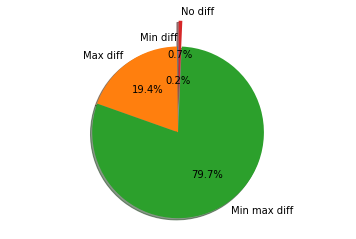

In [36]:
## Some plots
labels = ['Min diff', 'Max diff', 'Min max diff', 'No diff']
sizes = [len(min_diff), len(max_diff), len(min_max_diff), len(min_max_no_diff)]
explode = (0, 0, 0, 0.3)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [37]:
## Save plot
fig1.savefig(r"C:\Users\--\MinMax\Diff_pie.png")